### Random Forests and CNN on MNIST data

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)


In [108]:
# Normalize and reshape the data
x_train = x_train.reshape(60000, 28*28). \
                    astype('float32') / 255 #784

x_test = x_test.reshape(10000, 28*28) \
                    .astype('float32') / 255

## Random Forests

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [124]:
n_estimators=100
criterion='gini'
#criterion='entropy'

In [125]:

clf = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [126]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
predicted = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, predicted))

Accuracy:  0.9695


## 1.
With entropy as criterion,\
    estimators = 20  ---> Accuracy = 96.06\
    estimators = 100 ---> Accuracy = 96.95

With gini as criterion,\
    estimators = 20  ---> Accuracy = 95.98\
    estimators = 100 ---> Accuracy = 96.97

## 2. Confusion Matrix

In [134]:


confusion_matrix(y_test, predicted)


array([[ 971,    0,    0,    0,    0,    3,    3,    1,    2,    0],
       [   0, 1123,    3,    3,    0,    2,    2,    0,    1,    1],
       [   5,    0,  998,    6,    2,    0,    4,   10,    7,    0],
       [   0,    0,    7,  980,    0,    6,    0,    9,    6,    2],
       [   1,    0,    2,    0,  954,    0,    6,    0,    3,   16],
       [   3,    1,    0,   10,    4,  859,    6,    1,    6,    2],
       [   6,    3,    2,    0,    4,    3,  939,    0,    1,    0],
       [   2,    5,   22,    2,    0,    0,    0,  985,    1,   11],
       [   5,    0,    6,    7,    6,    5,    3,    4,  927,   11],
       [   6,    5,    3,   10,   11,    2,    0,    5,    8,  959]],
      dtype=int64)

In [136]:
predicted_tr = clf.predict(x_train)

print("training Accuracy: ", accuracy_score(y_train, predicted_tr))

training Accuracy:  1.0


## MLFFN

In [102]:
import keras.layers
from keras.models import Sequential
from keras.layers import Dense, Activation

In [109]:

model = Sequential()
model.add(Dense(300, activation='relu', \
                    input_shape=(784,)))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
NO_EPOCHS = 10
BATCH_SIZE = 64

In [112]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.2772 - accuracy: 0.9209 - val_loss: 0.1557 - val_accuracy: 0.9553
Epoch 2/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.1149 - accuracy: 0.9669 - val_loss: 0.1082 - val_accuracy: 0.9682
Epoch 3/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0761 - accuracy: 0.9771 - val_loss: 0.0920 - val_accuracy: 0.9720
Epoch 4/10
48000/48000 [==============================] - 6s 117us/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.0860 - val_accuracy: 0.9735
Epoch 5/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0780 - val_accuracy: 0.9758
Epoch 6/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0844 - val_accuracy: 0.9757
Epoch 7/10
48000/48000 [==============================] - 4s 88us

In [113]:
model.evaluate(x_test,y_test,verbose=0)[1]

0.9783999919891357

In [114]:
def plot_loss_acc(hist):
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['accuracy'], 'o-')
    ax.plot([None] + hist.history['val_accuracy'], 'x-')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train acc', 'Validation acc'], loc = 0)
    ax.set_title( 'Training/Validation acc per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
    
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['loss'], 'o-',c='r')
    ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train loss', 'Validation loss'], loc = 0)
    ax.set_title('Training/Validation loss per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()

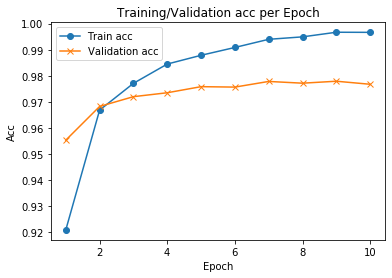

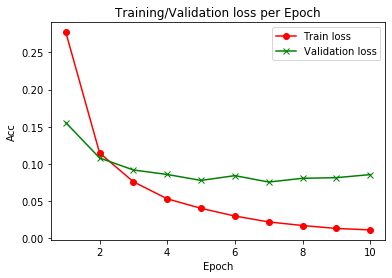

In [115]:
plot_loss_acc(history)

## 1.
For different optimizers, n=300\
    Adam --> 0.9782\
    SGD  --> 0.9304
    
For different optimizers, n=30\
    Adam --> 0.9358\
    SGD  --> 0.9265 
    
Without dropout, there is a little overfitting\ 
With dropout, overfitting is reduced.

The training accuracy is higher than testing accuracy when the testing accuracy is highest.

## 2. Confusion Matrix

In [117]:
y_pred = model.predict(x_test)
predictions = []

for i in y_pred:
    predictions.append(i.argmax())   
confusion_matrix(predictions, y_test)

array([[ 965,    0,    4,    1,    3,    2,    2,    0,    2,    1],
       [   0, 1124,    0,    0,    0,    1,    4,    4,    0,    2],
       [   1,    4, 1010,    0,    3,    0,    1,    5,    4,    0],
       [   0,    0,    3, 1000,    1,   27,    1,    1,    6,    6],
       [   0,    0,    2,    0,  947,    1,    1,    0,    0,    2],
       [   0,    0,    0,    1,    0,  842,    2,    0,    2,    1],
       [   5,    2,    2,    0,    2,    5,  945,    0,    0,    0],
       [   1,    0,    7,    3,    1,    2,    0, 1010,    5,    2],
       [   7,    5,    3,    1,    0,    7,    1,    1,  946,    0],
       [   1,    0,    1,    4,   25,    5,    1,    7,    9,  995]],
      dtype=int64)

## 3. tsne

In [118]:
emb_model = Sequential()
for layer in model.layers[:-1]:
    emb_model.add(layer)
emb_predict = emb_model.predict(x_train)
emb_predict.shape

(60000, 300)

In [119]:
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(emb_predict[:1000])

visualize = pd.DataFrame(data_reduced, columns = ['tsne-1', 'tsne-2'])

In [121]:
visualize["y"] = y_train[:1000]

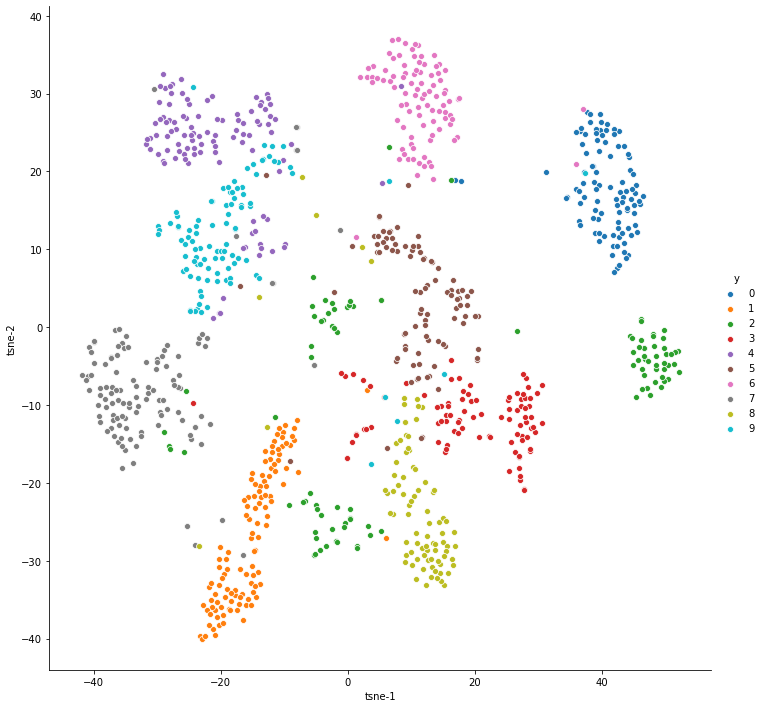

In [122]:
sns.pairplot(x_vars=["tsne-1"], y_vars=["tsne-2"], data=visualize, hue="y", height=10)

## CNN

In [20]:
from keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

x_train = x_train.reshape(x_train.shape[0], 28,28,1) 
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [22]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [24]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=6, kernel_size=(3, 3), \
                        activation='relu', input_shape=(28,28,1)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(10, activation='softmax'))


In [50]:
CNN_model.layers

In [25]:
CNN_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist2 = CNN_model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2267 - accuracy: 0.9317 - val_loss: 0.0587 - val_accuracy: 0.9812
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0866 - accuracy: 0.9751 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0669 - accuracy: 0.9807 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 44s 742us/step - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0308 - val_accuracy: 0.9887
Epoch 5/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.0498 - accuracy: 0.9855 - val_loss: 0.0311 - val_accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 50s 836us/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 53s 

In [27]:
score = CNN_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02648237742558704
Test accuracy: 0.9926999807357788


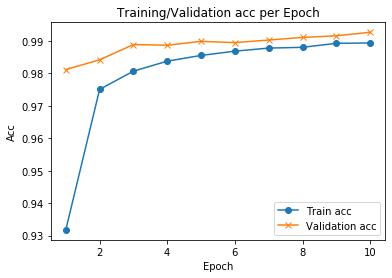

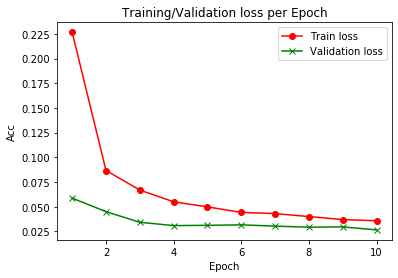

In [28]:
plot_loss_acc(hist2)

## 1. Training and Generalization Error

The model is underfitting. The training error is less than the testing error.

## 2. Confusion Matrix

In [43]:
y_pred = CNN_model.predict(x_test)
predictions = []

for i in y_pred:
    predictions.append(i.argmax())   
confusion_matrix(predictions, y_test.argmax(axis=1))

array([[ 977,    0,    2,    0,    0,    1,    4,    0,    1,    1],
       [   0, 1133,    2,    0,    0,    0,    3,    2,    0,    0],
       [   0,    0, 1021,    1,    0,    0,    0,    5,    2,    0],
       [   0,    1,    0, 1003,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    4],
       [   0,    0,    0,    5,    0,  888,    4,    0,    0,    6],
       [   1,    0,    0,    0,    0,    1,  945,    0,    0,    0],
       [   1,    0,    6,    0,    0,    0,    0, 1019,    1,    1],
       [   1,    1,    1,    1,    1,    0,    1,    1,  970,    2],
       [   0,    0,    0,    0,    5,    0,    0,    1,    0,  995]],
      dtype=int64)

## 3. tsne

In [47]:
import seaborn as sns
from sklearn.manifold import TSNE
from keras import models

In [95]:
emb_model = Sequential()
for layer in CNN_model.layers[:-1]:
    emb_model.add(layer)
emb_predict = emb_model.predict(x_train)
emb_predict.shape

(60000, 128)

In [98]:
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(emb_predict[:1000])

visualize = pd.DataFrame(data_reduced, columns = ['tsne-1', 'tsne-2'])

In [100]:
visualize["y"] = y_train.argmax(axis=1)[:1000]

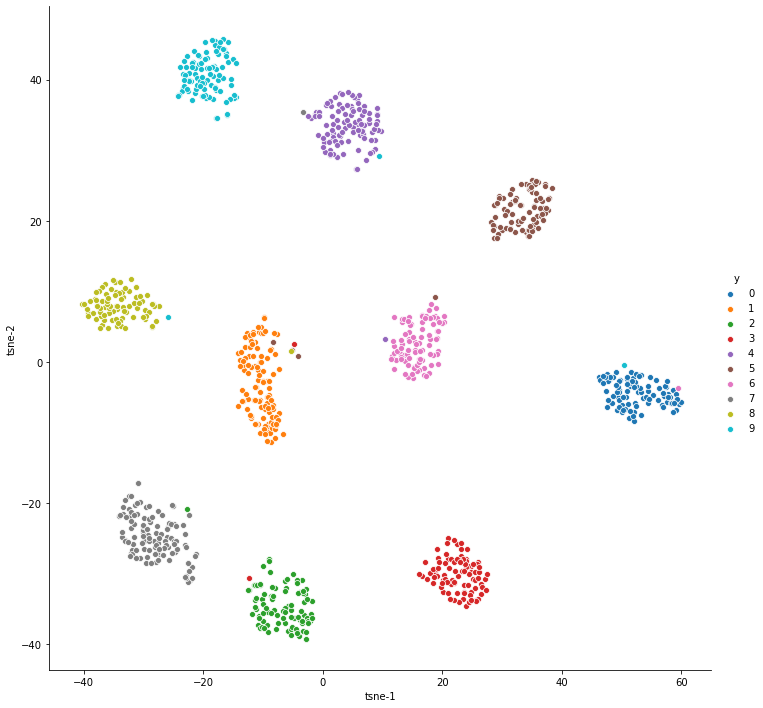

In [101]:
sns.pairplot(x_vars=["tsne-1"], y_vars=["tsne-2"], data=visualize, hue="y", height=10)